In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import statistics 
from scipy.stats import norm 
from scipy.stats import chi2
from scipy.stats import cauchy

# Esercitazione 3

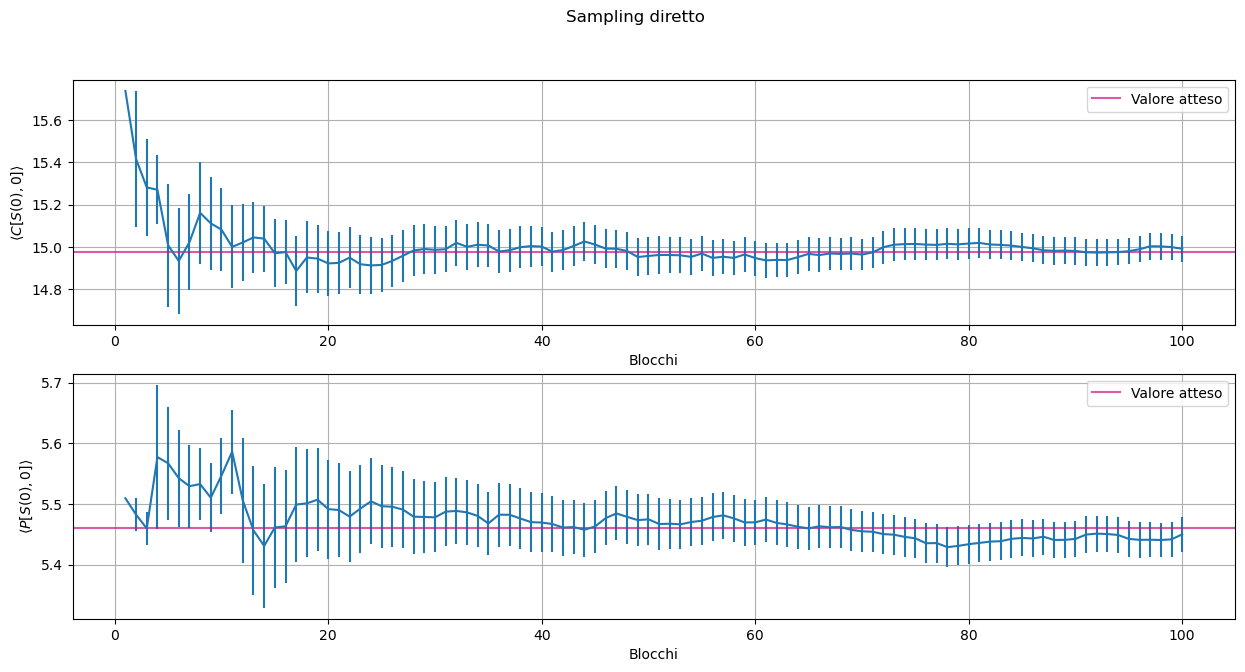

In [4]:
M=100000  #numero totale di estrazioni del generatore
N=100  #numero di blocchi
L=int(M/N)  #numero di estrazioni per blocco
x=np.arange(N)+1  #vettore delle ascisse dei punti plottati

dircy, dircerrorbars=np.loadtxt("directcall.dat", delimiter=" ", usecols=(0, 1),  unpack="true")  #vettore delle ordinate dei punti plottati
dirpy, dirperrorbars=np.loadtxt("directput.dat", delimiter=" ", usecols=(0, 1),  unpack="true")  #vettore delle ordinate dei punti plottati

dirfig ,(dirplt1, dirplt2) = plt.subplots(2, 1, figsize=(15, 7))

dirplt1.errorbar(x, dircy, yerr=dircerrorbars)
dirplt1.axhline(y=14.975790778311286, color="mediumvioletred", label="Valore atteso", alpha=0.7)
dirplt1.set_xlabel("Blocchi")
dirplt1.set_ylabel(r"$\left<C[S(0), 0]\right>$")
dirplt1.grid(True)
dirplt1.legend()

dirplt2.errorbar(x, dirpy, yerr=dirperrorbars)
dirplt2.axhline(y=5.4595325819072364, color="mediumvioletred", label="Valore atteso", alpha=0.7)
dirplt2.set_xlabel("Blocchi")
dirplt2.set_ylabel(r"$\left<P[S(0), 0]\right>$")
dirplt2.grid(True)
dirplt2.legend()

dirfig.suptitle("Sampling diretto")
plt.show()

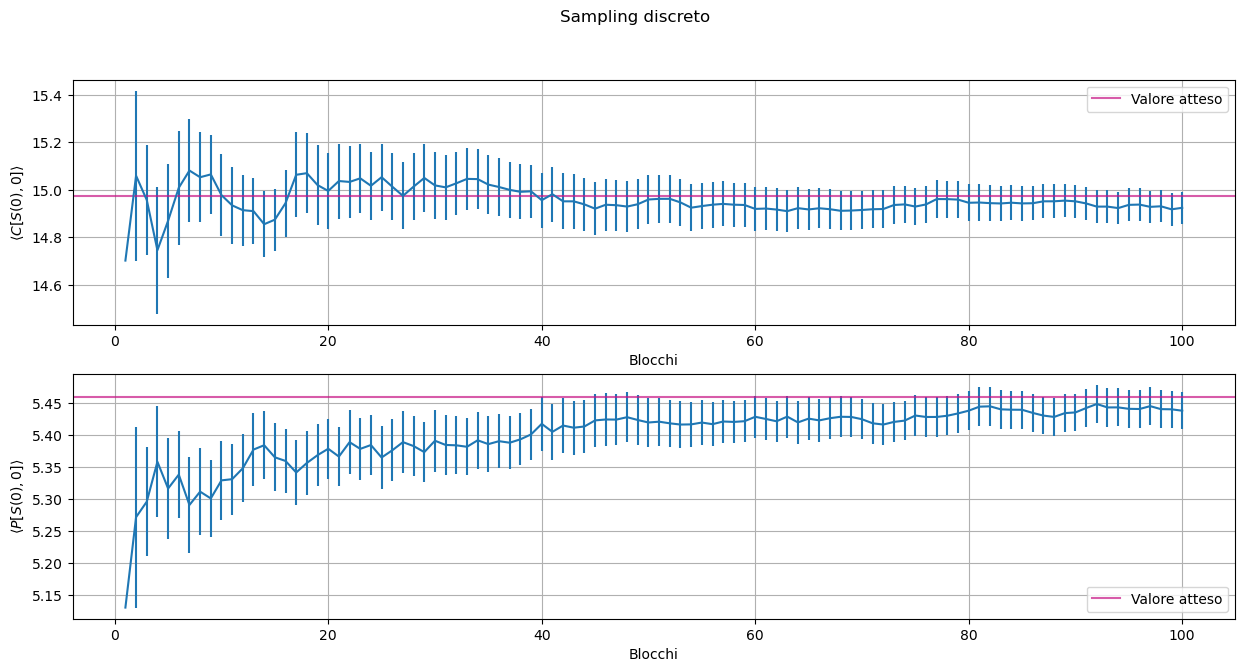

In [5]:
discy, discerrorbars=np.loadtxt("discretecall.dat", delimiter=" ", usecols=(0, 1),  unpack="true")  #vettore delle ordinate dei punti plottati
dispy, disperrorbars=np.loadtxt("discreteput.dat", delimiter=" ", usecols=(0, 1),  unpack="true")  #vettore delle ordinate dei punti plottati

disfig ,(displt1, displt2) = plt.subplots(2, 1, figsize=(15, 7))

displt1.errorbar(x, discy, yerr=discerrorbars)
displt1.axhline(y=14.975790778311286, color="mediumvioletred", label="Valore atteso", alpha=0.7)
displt1.set_xlabel("Blocchi")
displt1.set_ylabel(r"$\left<C[S(0), 0]\right>$")
displt1.grid(True)
displt1.legend()

displt2.errorbar(x, dispy, yerr=disperrorbars)
displt2.axhline(y=5.4595325819072364, color="mediumvioletred", label="Valore atteso", alpha=0.7)
displt2.set_xlabel("Blocchi")
displt2.set_ylabel(r"$\left<P[S(0), 0]\right>$")
displt2.grid(True)
displt2.legend()

disfig.suptitle("Sampling discreto")
plt.show()